In [0]:
import pandas as pd
import urllib
import geopandas as gpd

In [2]:
!pip install geopandas

    100% |████████████████████████████████| 901kB 20.0MB/s 
    100% |████████████████████████████████| 2.8MB 8.6MB/s 
    100% |████████████████████████████████| 1.5MB 16.1MB/s 
    100% |████████████████████████████████| 17.9MB 1.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built pyproj munch


In [5]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1FPhtWi23NnegizXzESe9LG8P486Xyl6r'}) # replace the id with id of file you want to access
downloaded.GetContentFile('model_data_f.csv')  

    100% |████████████████████████████████| 993kB 20.7MB/s 


In [0]:
data_one_hop1 = pd.read_csv('model_data_f.csv')

In [7]:
data_one_hop1.head()

,ADDR_PCT_CD,CRM_ATPT_CPTD_CD,JURISDICTION_CODE,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PARKS_NM,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,41,0,0.0,235,1,-1.0,0,18-24,1,1,...,0,0,0,0,0,0,0,0,0,1
1,104,0,0.0,347,1,1.0,0,45-64,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41,0,0.0,235,1,1.0,0,25-44,1,1,...,0,0,0,0,0,0,0,0,1,0
3,28,0,0.0,341,1,0.0,0,25-44,1,2,...,0,0,0,0,0,0,0,0,1,0
4,52,0,0.0,113,0,1.0,0,UNKNOWN,0,0,...,0,0,0,0,0,0,0,0,1,0


In [0]:
data_one_hop1.drop(columns = ['JURISDICTION_CODE','SUSP_AGE_GROUP','VIC_AGE_GROUP','yearoc'], inplace = True)

In [0]:
tester = data_one_hop1[['KY_CD']]

In [10]:
tester.head()

,KY_CD
0,235
1,347
2,235
3,341
4,113


In [0]:
data_one_hop1.drop(columns = ['KY_CD'],inplace = True)

In [12]:
data_one_hop1.head()

,ADDR_PCT_CD,CRM_ATPT_CPTD_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PARKS_NM,SUSP_RACE,SUSP_SEX,VIC_RACE,VIC_SEX,hour,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,41,0,1,-1.0,0,1,1,0,0,23,...,0,0,0,0,0,0,0,0,0,1
1,104,0,1,1.0,0,2,1,0,0,23,...,0,0,0,0,0,0,0,0,0,1
2,41,0,1,1.0,0,1,1,0,0,22,...,0,0,0,0,0,0,0,0,1,0
3,28,0,1,0.0,0,1,2,0,0,22,...,0,0,0,0,0,0,0,0,1,0
4,52,0,0,1.0,0,0,0,0,0,22,...,0,0,0,0,0,0,0,0,1,0


In [0]:
data_one_hop1['LOC_OF_OCCUR_DESC'] = data_one_hop1['LOC_OF_OCCUR_DESC'].replace(-1,5)

In [0]:
data_one_hop_final = pd.concat([data_one_hop1,tester],axis = 1)


In [16]:
data_one_hop_final.head()

,ADDR_PCT_CD,CRM_ATPT_CPTD_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PARKS_NM,SUSP_RACE,SUSP_SEX,VIC_RACE,VIC_SEX,hour,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,KY_CD
0,41,0,1,5.0,0,1,1,0,0,23,...,0,0,0,0,0,0,0,0,1,235
1,104,0,1,1.0,0,2,1,0,0,23,...,0,0,0,0,0,0,0,0,1,347
2,41,0,1,1.0,0,1,1,0,0,22,...,0,0,0,0,0,0,0,1,0,235
3,28,0,1,0.0,0,1,2,0,0,22,...,0,0,0,0,0,0,0,1,0,341
4,52,0,0,1.0,0,0,0,0,0,22,...,0,0,0,0,0,0,0,1,0,113


In [0]:
import numpy as np
s = np.random.rand(len(data_one_hop_final)) <= 0.80
train = data_one_hop_final[s]
test = data_one_hop_final[~s]
train_df = train.iloc[:,:-1]
test_df = test.iloc[:,:-1]

y_train = train.iloc[:,-1]
y_test = test.iloc[:,-1]

In [0]:
label = data_one_hop_final.KY_CD.unique().tolist()

DECISION TREE

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(criterion='entropy')
dtree1.fit(train_df,y_train)
train_churndep_DT=dtree1.predict(train_df)
test_churndep_DT=dtree1.predict(test_df)

accuracy_train_df = sum((y_train-train_churndep_DT)==0)/len(y_train)*100
accuarcy_test_df = sum((y_test-test_churndep_DT)==0)/len(y_test)*100

print(accuracy_train_df)
print(accuarcy_test_df)

94.65386759697283
52.081189376190586


[[ 797   74   15 ...    0    0    0]
 [  78  274    4 ...    0    0    0]
 [  17   10 5366 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


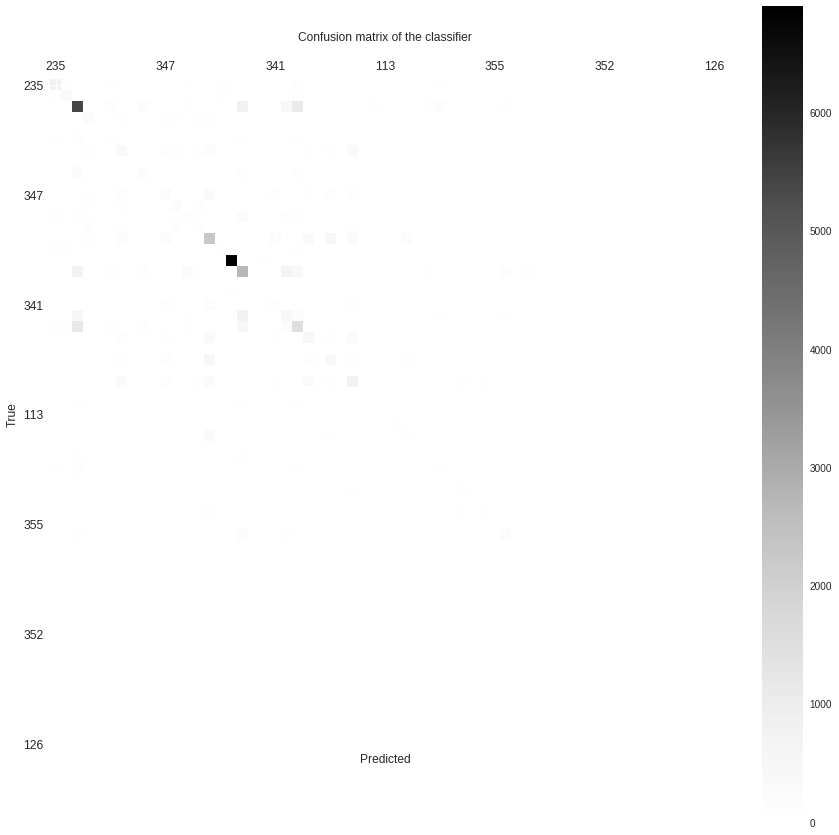

<Figure size 576x396 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt
import pylab as pl
cm = confusion_matrix(y_test, test_churndep_DT, label)
print(cm)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar(cax)
ax.set_xticklabels([''] + label, fontsize=12.0)
ax.set_yticklabels([''] + label, fontsize=12.0)
plt.xlabel('Predicted', fontsize=12.0)
plt.ylabel('True', fontsize=12.0)
plt.show()
pl.savefig('cm1.png')

MULTILAYER PERCEPTRON

In [18]:
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(learning_rate = 'constant', activation = 'relu', alpha=1, batch_size = 300)
clf1.fit(train_df,y_train)
train_churndep1_MLP=clf1.predict(train_df)
test_churndep1_MLP=clf1.predict(test_df)

accuracy_train_df = sum((y_train-train_churndep1_MLP)==0)/len(y_train)*100
accuarcy_test_df = sum((y_test-test_churndep1_MLP)==0)/len(y_test)*100

print(accuracy_train_df)
print(accuarcy_test_df)

60.26805182188023
60.708107989752804


[[1117   50    6 ...    0    0    0]
 [ 142  243    7 ...    0    0    0]
 [  15    0 6937 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


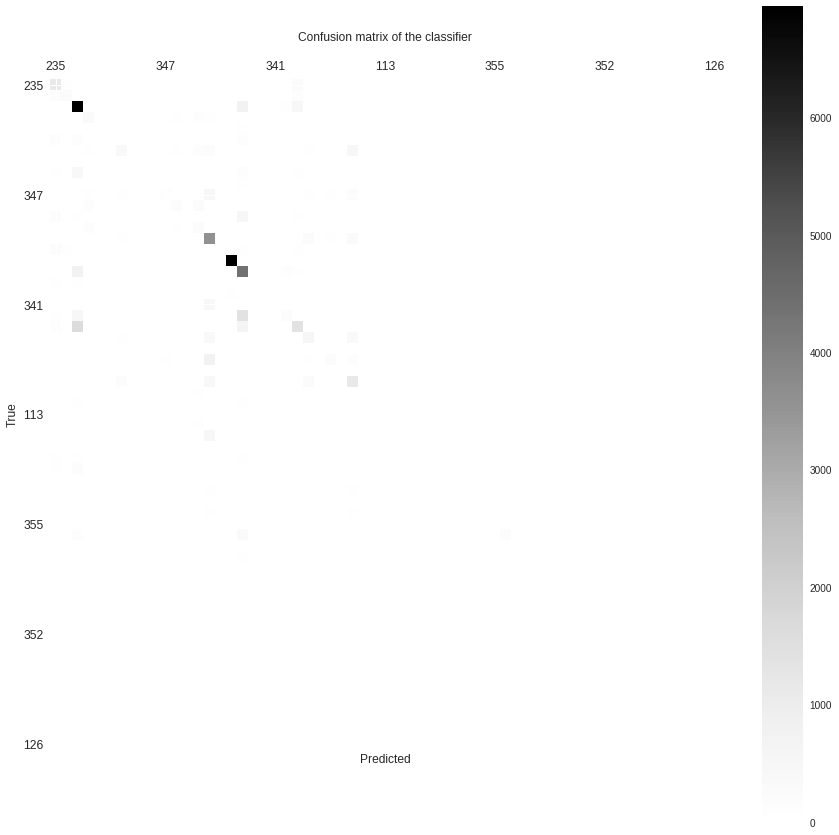

<Figure size 576x396 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
import pylab as pl
cm = confusion_matrix(y_test, test_churndep1_MLP, label)
print(cm)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar(cax)
ax.set_xticklabels([''] + label, fontsize=12.0)
ax.set_yticklabels([''] + label, fontsize=12.0)
plt.xlabel('Predicted', fontsize=12.0)
plt.ylabel('True', fontsize=12.0)
plt.show()
pl.savefig('cm1.png')

MULTINOMIAL NAIVE BAYES

In [20]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(train_df,y_train)
train_churndep_MNB=clf.predict(train_df)
test_churndep_MNB=clf.predict(test_df)

accuracy_train_df = sum((y_train-train_churndep_MNB)==0)/len(y_train)*100
accuarcy_test_df = sum((y_test-test_churndep_MNB)==0)/len(y_test)*100

print(accuracy_train_df)
print(accuarcy_test_df)

45.818866299769816
46.23940793939261


[[ 988  163    4 ...    0    0    0]
 [  74  365    1 ...    0    0    0]
 [ 230   16 2919 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


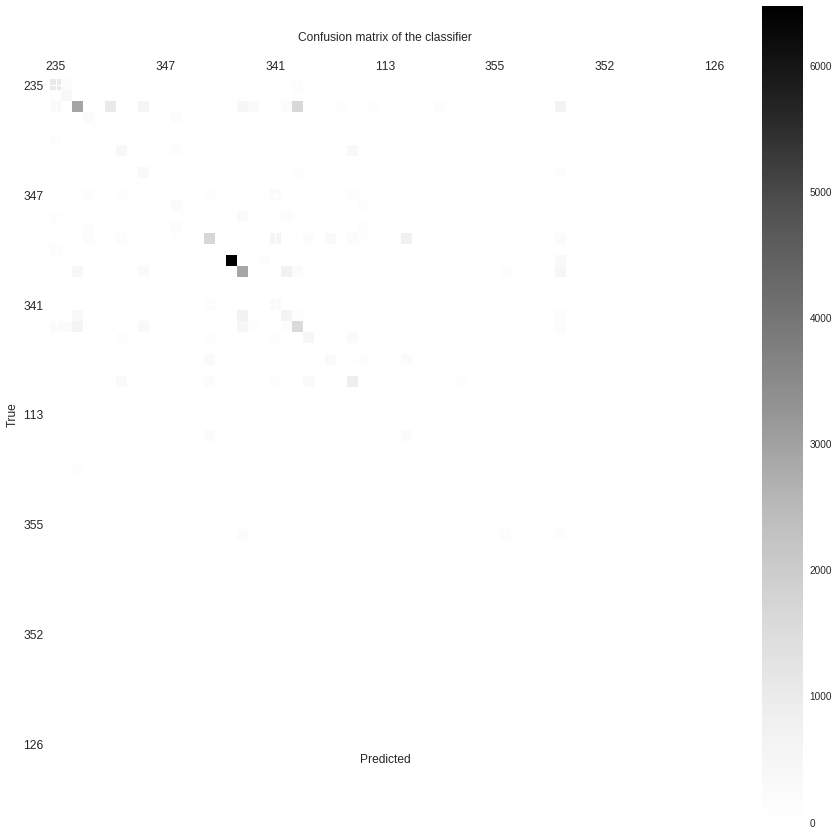

<Figure size 576x396 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
import pylab as pl 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_churndep_MNB, label)
print(cm)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar(cax)
ax.set_xticklabels([''] + label, fontsize=12.0)
ax.set_yticklabels([''] + label, fontsize=12.0)
plt.xlabel('Predicted', fontsize=12.0)
plt.ylabel('True', fontsize=12.0)
plt.show()
pl.savefig('cm1.png')

LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression
l1 = LogisticRegression()
l1.fit(train_df,y_train)
train_churndep=l1.predict(train_df)
test_churndep=l1.predict(test_df)

accuracy_train_df = sum((y_train-train_churndep)==0)/len(y_train)*100
accuarcy_test_df = sum((y_test-test_churndep)==0)/len(y_test)*100

print(accuracy_train_df)
print(accuarcy_test_df)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


59.929123035565446
60.276762059074684


[[1111   72    7 ...    0    0    0]
 [  85  329    5 ...    0    0    0]
 [  16    0 6765 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


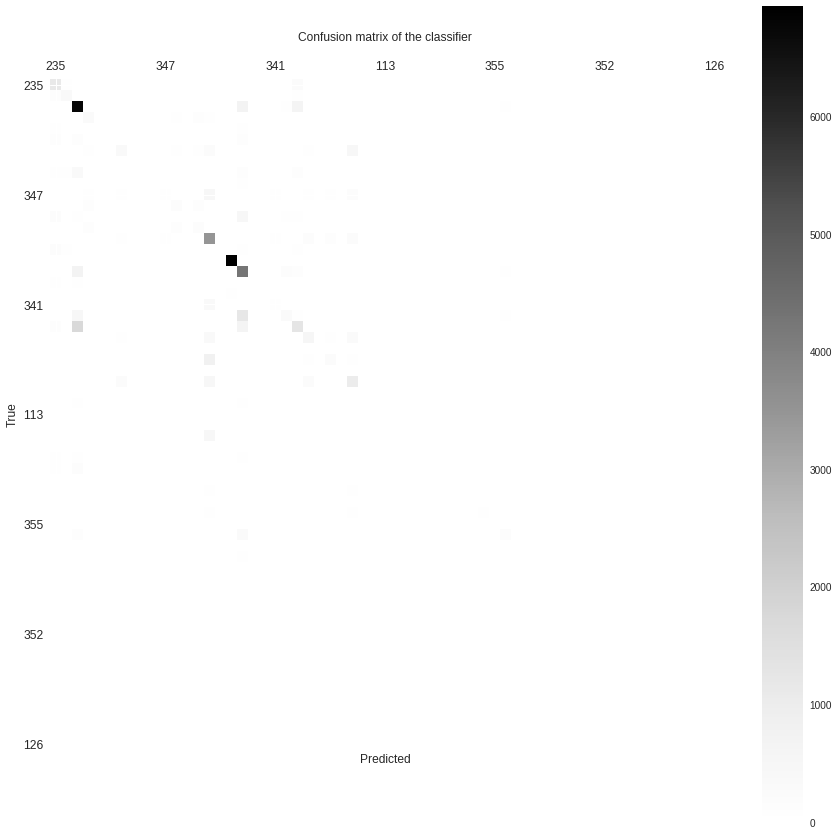

<Figure size 576x396 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
import pylab as pl 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_churndep, label)
print(cm)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar(cax)
ax.set_xticklabels([''] + label, fontsize=12.0)
ax.set_yticklabels([''] + label, fontsize=12.0)
plt.xlabel('Predicted', fontsize=12.0)
plt.ylabel('True', fontsize=12.0)
plt.show()
pl.savefig('cm1.png')

RANDOM FOREST CLASSIFIER

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rc=RandomForestClassifier(n_estimators=10, criterion='entropy', max_features=3)
rc.fit(train_df,y_train)
train_churndep_RC=rc.predict(train_df)
test_churndep_RC=rc.predict(test_df)

accuracy_train_df = sum((y_train-train_churndep_RC)==0)/len(y_train)*100
accuarcy_test_df = sum((y_test-test_churndep_RC)==0)/len(y_test)*100

print(accuracy_train_df)
print(accuarcy_test_df)

92.31724617601112
54.65174837424186


[[ 805   74   12 ...    0    0    0]
 [  77  293    5 ...    0    0    0]
 [  11    6 5581 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


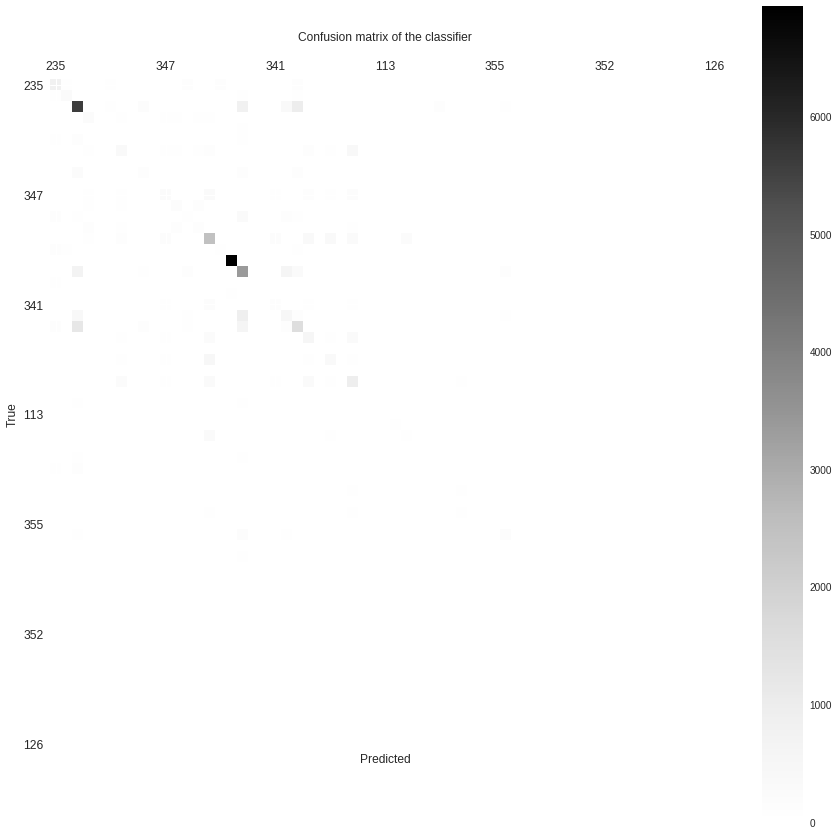

<Figure size 576x396 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
import pylab as pl 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_churndep_RC, label)
print(cm)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar(cax)
ax.set_xticklabels([''] + label, fontsize=12.0)
ax.set_yticklabels([''] + label, fontsize=12.0)
plt.xlabel('Predicted', fontsize=12.0)
plt.ylabel('True', fontsize=12.0)
plt.show()
pl.savefig('cm1.png')

VOTING CLASSIFIER

In [32]:
from sklearn.ensemble import VotingClassifier
eclf2 = VotingClassifier(estimators=[('lr', rc), ('rf', clf1), ('gnb', clf)], voting='hard')

eclf2.fit(train_df,y_train)
train_churndep3=eclf2.predict(train_df)
test_churndep3=eclf2.predict(test_df)

accuracy_train_df = sum((y_train-train_churndep3)==0)/len(y_train)*100
accuarcy_test_df = sum((y_test-test_churndep3)==0)/len(y_test)*100

print(accuracy_train_df)
print(accuarcy_test_df)

69.20660855933185
58.92360578923168


[[1082   95    7 ...    0    0    0]
 [  95  333    6 ...    0    0    0]
 [  30    3 6445 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


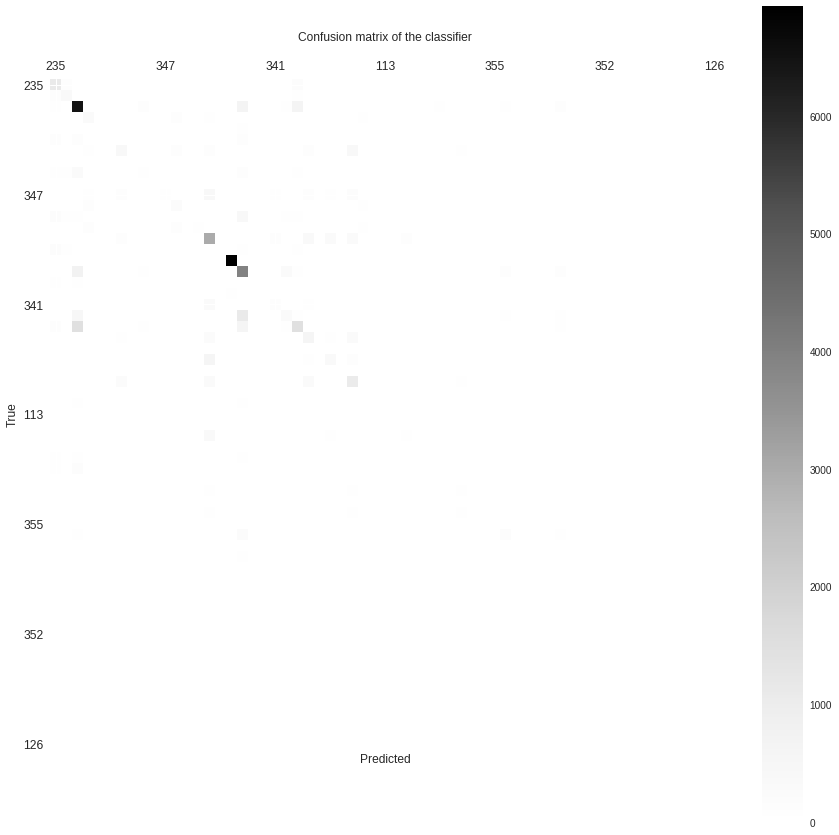

<Figure size 576x396 with 0 Axes>

In [35]:
#Confusion Matrix

cm = confusion_matrix(y_test, test_churndep3, label)
print(cm)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + label, fontsize=12.0)
ax.set_yticklabels([''] + label, fontsize=12.0)
plt.xlabel('Predicted', fontsize=12.0)
plt.ylabel('True', fontsize=12.0)
plt.show()
pl.savefig('cm1.png')